<a href="https://colab.research.google.com/github/csabajozsef/adatviz/blob/main/First_look_at_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
df_edges = pd.read_csv('DATA/large_twitch_edges.csv')
df_nodes = pd.read_csv('DATA/large_twitch_features.csv')

In [4]:
df_edges.head()

,numeric_id_1,numeric_id_2
0,98343,141493
1,98343,58736
2,98343,140703
3,98343,151401
4,98343,157118


In [5]:
df_edges.shape

(6797557, 2)

In [6]:
df_nodes.head()

,views,mature,life_time,created_at,updated_at,numeric_id,dead_account,language,affiliate
0,7879,1,969,2016-02-16,2018-10-12,0,0,EN,1
1,500,0,2699,2011-05-19,2018-10-08,1,0,EN,0
2,382502,1,3149,2010-02-27,2018-10-12,2,0,EN,1
3,386,0,1344,2015-01-26,2018-10-01,3,0,EN,0
4,2486,0,1784,2013-11-22,2018-10-11,4,0,EN,0


In [7]:
df_nodes.shape

(168114, 9)

In [8]:
df_nodes.dtypes

views            int64
mature           int64
life_time        int64
created_at      object
updated_at      object
numeric_id       int64
dead_account     int64
language        object
affiliate        int64
dtype: object

In [9]:
# binary/categorical data - count 

In [10]:
df_nodes.columns

Index(['views', 'mature', 'life_time', 'created_at', 'updated_at',
       'numeric_id', 'dead_account', 'language', 'affiliate'],
      dtype='object')

In [11]:
df_for_value_counts = df_nodes[['mature','dead_account', 'language', 'affiliate']]

In [12]:
df_for_value_counts.apply(pd.Series.value_counts)

,mature,dead_account,language,affiliate
0,89081.0,162955.0,NaN,86568.0
1,79033.0,5159.0,NaN,81546.0
CS,NaN,NaN,576.0,NaN
DA,NaN,NaN,503.0,NaN
DE,NaN,NaN,9428.0,NaN
EN,NaN,NaN,124411.0,NaN
ES,NaN,NaN,5699.0,NaN
FI,NaN,NaN,652.0,NaN
FR,NaN,NaN,6799.0,NaN
HU,NaN,NaN,427.0,NaN


In [13]:
df_for_value_counts['language'].value_counts(normalize=True)

EN       0.740039
DE       0.056081
FR       0.040443
ES       0.033900
RU       0.028677
ZH       0.016822
PT       0.015085
OTHER    0.008500
JA       0.007893
IT       0.007316
KO       0.007227
PL       0.005615
SV       0.005080
TR       0.004592
NL       0.004170
FI       0.003878
TH       0.003759
CS       0.003426
DA       0.002992
HU       0.002540
NO       0.001963
Name: language, dtype: float64

In [14]:
# df_nodes.groupby(['language']).agg({'language':['count']}).sort_values([('language','count')],ascending=True)
# multi-level indexing

In [15]:
# all pairs are different in the edge dataset: 
df_edges.groupby(['numeric_id_1','numeric_id_2']).agg({'numeric_id_2':['count']})

numeric_id_2
                                 count
numeric_id_1 numeric_id_2             
0            10464                   1
             38806                   1
             53471                   1
             59443                   1
             96866                   1
...                                ...
168112       163534                  1
             164247                  1
             164996                  1
             165661                  1
             166575                  1

[6797557 rows x 1 columns]

In [17]:
df_edges_grouped = df_edges.groupby(['numeric_id_1','numeric_id_2']).size()
df_edges_grouped.head(20)

numeric_id_1  numeric_id_2
0             10464           1
              38806           1
              53471           1
              59443           1
              96866           1
              126592          1
              135216          1
              146421          1
              151601          1
1             922             1
              1081            1
              2220            1
              13754           1
              15080           1
              19719           1
              23378           1
              28327           1
              35618           1
              40490           1
              43359           1
dtype: int64

In [18]:
df_edges_grouped = df_edges.groupby(['numeric_id_1','numeric_id_2']).size().reset_index(name = 'counts')
df_edges_grouped.head(10)

,numeric_id_1,numeric_id_2,counts
0,0,10464,1
1,0,38806,1
2,0,53471,1
3,0,59443,1
4,0,96866,1
5,0,126592,1
6,0,135216,1
7,0,146421,1
8,0,151601,1
9,1,922,1


In [19]:
# degrees for each node
df_of_degrees = df_edges.groupby(['numeric_id_1']).count().sort_values(['numeric_id_2'], ascending=False)
df_of_degrees

,numeric_id_2
numeric_id_1,
61862,35208
125642,31036
32338,30463
71050,29905
110345,22601
...,...
129346,1
19246,1
107161,1


In [20]:
# nem minden node került bele
# ennyi node van 168114

In [21]:
df_of_degrees['numeric_id_2'].describe()

count    123518.000000
mean         55.032926
std         350.330796
min           1.000000
25%           3.000000
50%           9.000000
75%          30.000000
max       35208.000000
Name: numeric_id_2, dtype: float64

In [24]:
df_of_degrees[df_of_degrees['numeric_id_2']>55]

,numeric_id_2
numeric_id_1,
61862,35208
125642,31036
32338,30463
71050,29905
110345,22601
...,...
143212,56
160280,56
97426,56


In [ ]:
hist = df_of_degrees.hist(bins=100)

In [ ]:
df_edges.shape

In [ ]:
df_edges['numeric_id_2'].unique().size

In [ ]:
df_edges['numeric_id_1'].unique().size

In [ ]:
# ennyi node van 168114 azaz 2es oszlopban majdnem mindegyik szerepel
# ugyanaz a node szerepel mindk2 oldalon
# minden él egyszer -> végigmegyünk mindkét oldalon és mindkét idhez +1 a degree
# először egyikre groupby aztám másikra külön es a kettő join

In [ ]:
df_edges.head()

In [44]:
df_group_one = df_edges.groupby('numeric_id_1').count().sort_index()
df_group_one

,numeric_id_2
numeric_id_1,
0,9
1,49
2,20
4,5
5,20
...,...
168106,56
168107,9
168108,10


In [46]:
df_group_two = df_edges.groupby('numeric_id_2').count().sort_index()
df_group_two

,numeric_id_1
numeric_id_2,
0,34
1,229
2,102
3,11
4,28
...,...
168109,39
168110,1
168111,15


In [36]:
df_group_two.index

Int64Index([ 30472,  98358, 148430, 148435,  63386, 148439, 148456,  30000,
             63338,  30007,
            ...
             77701,  21913, 136179, 121730, 122133, 104231,  47968, 138436,
            101472, 148398],
           dtype='int64', name='numeric_id_2', length=167934)

In [29]:
# az id kat kell egybe tenni, ami megegyezik annak a countot összeadjuk, 
# ha nincs ugyanaz a node a másikban akkor csak simán bevesszük

In [33]:
# outer_merged = pd.merge(df_group_one, df_group_two, how="outer", on=["numeric_id_1"])
# outer_merged.head(10) # indexen kellene joinolni

,numeric_id_1,numeric_id_2
0,83288,1.0
1,95532,1.0
2,31445,1.0
3,95530,1.0
4,136352,1.0
5,31441,1.0
6,136365,1.0
7,31431,1.0
8,136368,1.0
9,31423,1.0


In [34]:
outer_merged.shape

(291048, 2)

In [38]:
outer_merged_with_concat = pd.concat([df_group_one, df_group_two], axis=1)
outer_merged_with_concat
# ahol Nan szerepelt ott csak az egyik él oszlopban szerepelt a node
# Nan szám = összes node - groupone - group2

,numeric_id_2,numeric_id_1
0,9.0,34.0
1,49.0,229.0
2,20.0,102.0
3,NaN,11.0
4,5.0,28.0
...,...,...
168109,4.0,39.0
168110,NaN,1.0
168111,NaN,15.0
168112,207.0,33.0


In [47]:
df_nodes.shape

(168114, 9)

In [51]:
outer_merged_with_concat.isna().sum().sum()

44776

In [56]:
# outer_merged_with_concat['degrees'] = outer_merged_with_concat['numeric_id_1']+ outer_merged_with_concat['numeric_id_2']
outer_merged_with_concat["degrees"] = outer_merged_with_concat.sum(axis=1, skipna = True)
outer_merged_with_concat

,numeric_id_2,numeric_id_1,degrees
0,9.0,34.0,129.0
1,49.0,229.0,834.0
2,20.0,102.0,366.0
3,NaN,11.0,11.0
4,5.0,28.0,99.0
...,...,...,...
168109,4.0,39.0,129.0
168110,NaN,1.0,1.0
168111,NaN,15.0,15.0
168112,207.0,33.0,720.0


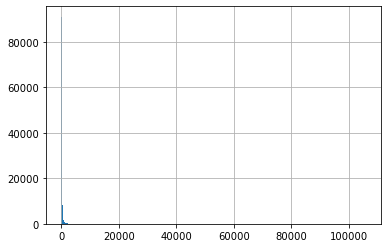

In [58]:
hist = outer_merged_with_concat['degrees'].hist(bins=1000)

In [77]:
outer_merged_with_concat['degrees'].describe(percentiles=[0.25, 0.5, *[i/100 for i in range(75,96,5)],*[i/1000 for i in range(990,999,1)]])

count    168114.000000
mean        236.659100
std         943.722184
min           1.000000
25%          21.000000
50%          90.000000
75%         225.000000
80%         276.000000
85%         354.000000
90%         486.000000
95%         792.000000
99%        2223.000000
99.1%      2385.000000
99.2%      2565.576000
99.3%      2802.627000
99.4%      3135.000000
99.5%      3526.305000
99.6%      4122.000000
99.7%      5043.966000
99.8%      6587.220000
max      105837.000000
Name: degrees, dtype: float64

In [78]:
outer_merged_with_concat['degrees'].describe(percentiles=[0.25, 0.5, *[i/100 for i in range(75,96,5)],*[i/1000 for i in range(990,999,1)]]).T

count    168114.000000
mean        236.659100
std         943.722184
min           1.000000
25%          21.000000
50%          90.000000
75%         225.000000
80%         276.000000
85%         354.000000
90%         486.000000
95%         792.000000
99%        2223.000000
99.1%      2385.000000
99.2%      2565.576000
99.3%      2802.627000
99.4%      3135.000000
99.5%      3526.305000
99.6%      4122.000000
99.7%      5043.966000
99.8%      6587.220000
max      105837.000000
Name: degrees, dtype: float64

In [79]:
outer_merged_with_concat.describe(percentiles=[0.25, 0.5, *[i/100 for i in range(75,96,5)],*[i/1000 for i in range(990,999,1)]])

,numeric_id_2,numeric_id_1,degrees
count,123518.000000,167934.000000,168114.000000
mean,55.032926,40.477551,236.659100
std,350.330796,49.983290,943.722184
min,1.000000,1.000000,1.000000
25%,3.000000,10.000000,21.000000
50%,9.000000,24.000000,90.000000
75%,30.000000,51.000000,225.000000
80%,41.000000,60.000000,276.000000
85%,58.000000,74.000000,354.000000
90%,91.000000,94.000000,486.000000


In [80]:
outer_merged_with_concat.describe(percentiles=[0.25, 0.5, *[i/100 for i in range(75,96,5)],*[i/1000 for i in range(990,999,1)]]).T

,count,mean,std,min,25%,50%,75%,80%,85%,90%,...,99%,99.1%,99.2%,99.3%,99.4%,99.5%,99.6%,99.7%,99.8%,max
numeric_id_2,123518.0,55.032926,350.330796,1.0,3.0,9.0,30.0,41.0,58.0,91.0,...,730.0,796.347,891.864,999.381,1118.0,1292.415,1551.524,1960.449,2538.66,35208.0
numeric_id_1,167934.0,40.477551,49.983290,1.0,10.0,24.0,51.0,60.0,74.0,94.0,...,240.0,247.000,257.000,268.000,281.0,296.000,318.000,343.000,379.00,1048.0
degrees,168114.0,236.659100,943.722184,1.0,21.0,90.0,225.0,276.0,354.0,486.0,...,2223.0,2385.000,2565.576,2802.627,3135.0,3526.305,4122.000,5043.966,6587.22,105837.0
